<a href="https://colab.research.google.com/github/Aldistwn29/Natural_language_processing/blob/main/Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Data Loading

In [75]:
kolom_name = ['tweet id', 'entity', 'sentiment', 'tweet content']
df = pd.read_csv("twitter_validation.csv", names=kolom_name, header=None)
df.head()

,tweet id,entity,sentiment,tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [108]:
df.shape

(1000, 5)

# Data Cleaning

In [76]:
# sebelum dihapus
df.isnull().sum()

tweet id         0
entity           0
sentiment        0
tweet content    0
dtype: int64

In [78]:
# setelah dihapus
df = df.dropna()
df.isnull().sum()

tweet id         0
entity           0
sentiment        0
tweet content    0
dtype: int64

**Menghapus Duplikat**

In [79]:
# sebelum dihapus
df.duplicated().sum()

0

In [85]:
# setelah dihapus
df = df.drop_duplicates()
df_no_duplikat = df.duplicated().sum()
print(f'data sudah dihapus duplikat {df_no_duplikat} ')

data sudah dihapus duplikat 0 


**Menghapus outliners**

[Text(0.5, 1.0, 'Distribusi of tweet content length')]

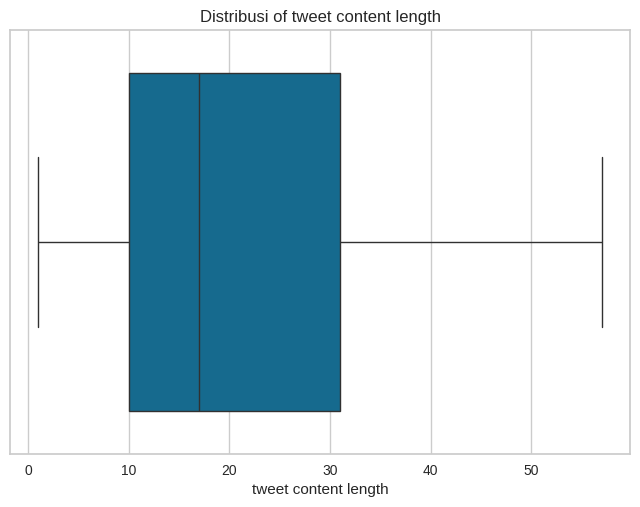

In [90]:
# identifikasi outliners di kolom tweet conteent
df['tweet content length'] = df['tweet content'].map(lambda x: len(x.split(" ")))
sns.boxplot(x="tweet content length", data=df).set(title="Distribusi of tweet content length")

In [96]:
# Menggunakan rumus outliers pada baris
lower_quartile = np.percentile(df['tweet content length'], 25)
median = np.percentile(df['tweet content length'], 50)
upper_quartile = np.percentile(df['tweet content length'], 75)

interquartile_range = upper_quartile - lower_quartile
lower_boundry = lower_quartile - 1.5*interquartile_range
upper_boundry = upper_quartile + 1.5*interquartile_range

# panjang tweet yg melebihi batas bawah dan batas atas akan di hapus
print("lower_boundry: ",lower_boundry)
print("upper_boundry: ",upper_boundry)

lower_boundry:  -21.5
upper_boundry:  62.5


In [113]:
# menghapus outliers
remove_df =df[(df['tweet content length'] >= lower_boundry) & (df['tweet content length'] <= upper_boundry)]

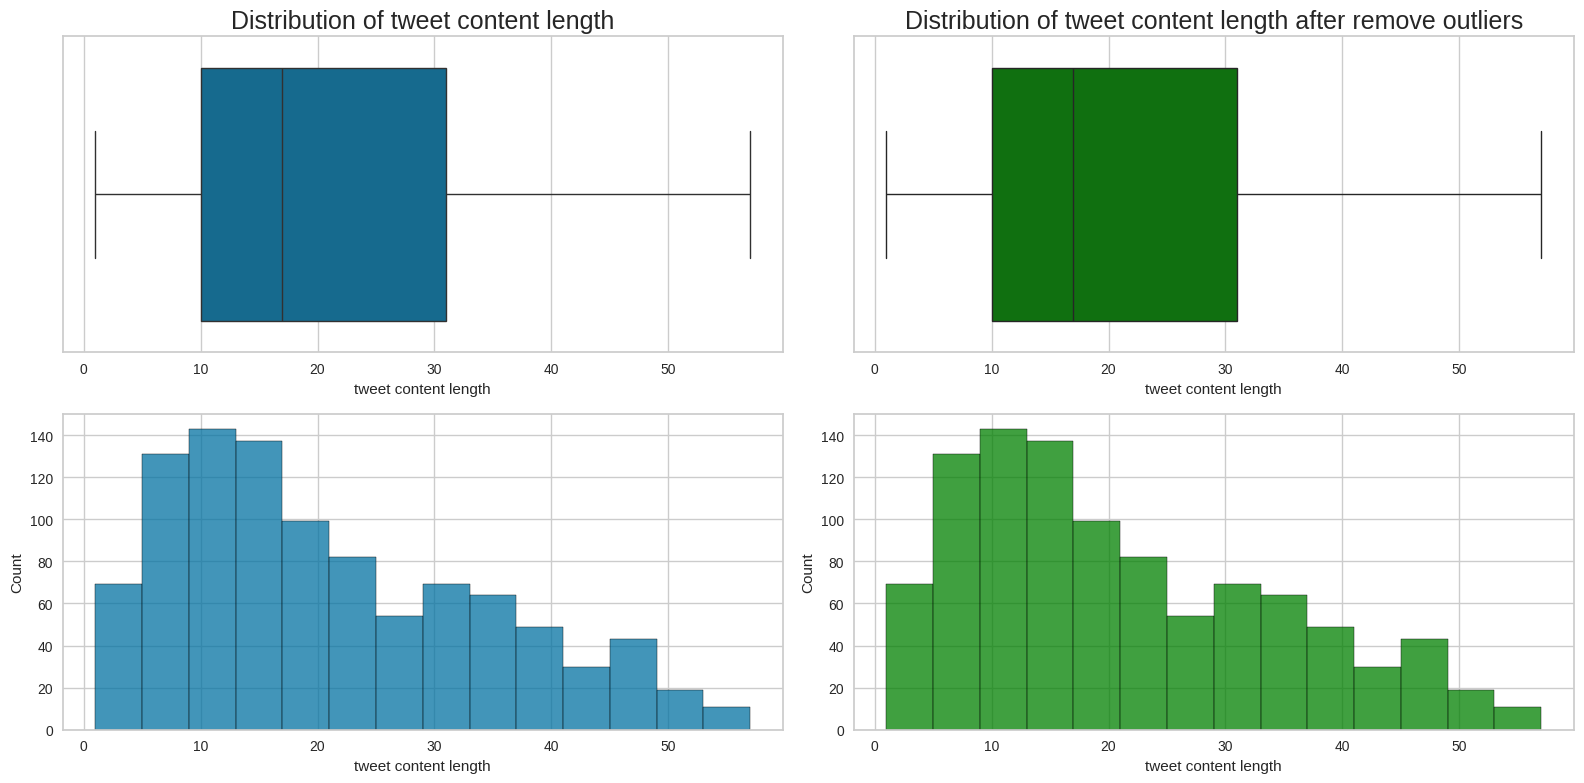

In [114]:
# visualisasi untuk membandingkan setelah dan sebelum outliers di hapus
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

# distribusi of tweet content length
sns.boxplot(x="tweet content length", data=df, ax=ax[0,0]).set_title("Distribution of tweet content length", fontsize=18)
sns.boxplot(x="tweet content length", data=remove_df, ax=ax[0,1], color="green").set_title("Distribution of tweet content length after remove outliers", fontsize=18)

# frequency of tweet content length
sns.histplot(x="tweet content length", data=df, ax=ax[1,0])
sns.histplot(x="tweet content length", data=remove_df, ax=ax[1,1], color="green")
fig.tight_layout()

Panjang content tweet tidak ada perubahan, itu berarti dataset sudah tidak ada outliers

** Penyebaran labels setelah data bersih**

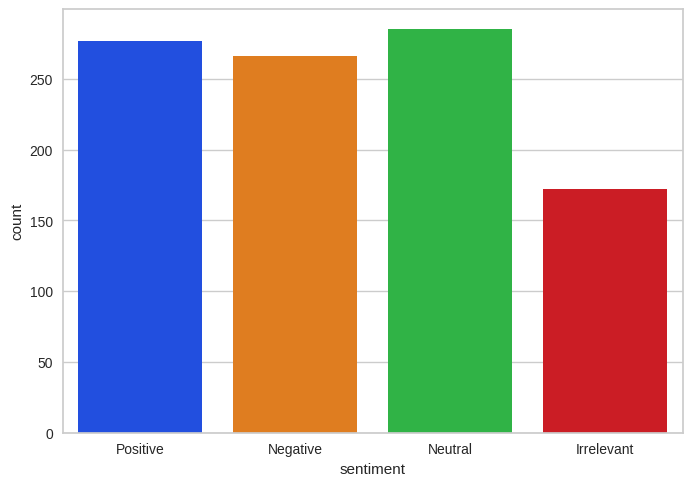

In [129]:
# menetukan urutan kategori
kategori = ["Positive", "Negative", "Neutral", "Irrelevant"]
sns.countplot(x="sentiment", data=remove_df, palette='bright', order=kategori)
plt.show()

# Exploratory Data Analysis

# Data Splitting

# Text Preprocessing

# Models